In [35]:
!pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/homebrew/lib/python3.11/site-packages
Requires: tensorflow-macos
Required-by: 


In [36]:
!pip3 install -U pycryptodome

In [37]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [38]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
test_path = 'Datasets/test'

In [39]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [40]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [41]:
for layer in resnet.layers:
    layer.trainable = False

In [42]:
folders = glob('Datasets/train/*')

In [43]:
folders

['Datasets/train/Genshin Impact',
 'Datasets/train/God of War',
 'Datasets/train/Roblox',
 'Datasets/train/Apex Legends',
 'Datasets/train/Among Us',
 'Datasets/train/Terraria',
 'Datasets/train/Free Fire',
 'Datasets/train/Minecraft',
 'Datasets/train/Forza Horizon',
 'Datasets/train/Fortnite']

In [44]:
x = Flatten()(resnet.output)

In [45]:
len(folders)

10

In [46]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [47]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [48]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [50]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 10 classes.


In [51]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 10 classes.


In [54]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/var/folders/z_/68bc0ggj7nx_ngp9z73f7tq80000gn/T/ipykernel_3948/1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
250/250 [==============================] - 321s 1s/step - loss: 1.0473 - accuracy: 0.6951 - val_loss: 0.9319 - val_accuracy: 0.7205
Epoch 2/50
250/250 [==============================] - 363s 1s/step - loss: 0.9290 - accuracy: 0.7333 - val_loss: 0.9286 - val_accuracy: 0.7525
Epoch 3/50
250/250 [==============================] - 366s 1s/step - loss: 0.9510 - accuracy: 0.7309 - val_loss: 0.5194 - val_accuracy: 0.8540
Epoch 4/50
250/250 [==============================] - 363s 1s/step - loss: 0.8060 - accuracy: 0.7669 - val_loss: 0.6440 - val_accuracy: 0.8350
Epoch 5/50
250/250 [==============================] - 380s 2s/step - loss: 0.8174 - accuracy: 0.7724 - val_loss: 0.5531 - val_accuracy: 0.8455
Epoch 6/50
250/250 [==============================] - 359s 1s/step - loss: 0.7810 - accuracy: 0.7769 - val_loss: 0.8019 - val_accuracy: 0.7870
Epoch 7/50
250/250 [==============================] - 339s 1s/step - loss: 0.7431 - accuracy: 0.7939 - val_loss: 0.5775 - val_accuracy: 0.8435

In [55]:
r.history

{'loss': [1.0472828149795532,
  0.9290341138839722,
  0.9510189890861511,
  0.8060183525085449,
  0.8173719644546509,
  0.781008243560791,
  0.7431192398071289,
  0.8355538249015808,
  0.7556437849998474,
  0.9155889749526978,
  0.8171805143356323,
  0.5626608729362488,
  0.7500638365745544,
  0.72941654920578,
  0.5828393697738647,
  0.6020473837852478,
  0.6718749403953552,
  0.6805654168128967,
  0.5852264165878296,
  0.64068204164505,
  0.5736516714096069,
  0.6755837798118591,
  0.6306951642036438,
  0.6227455735206604,
  0.578994631767273,
  0.633628249168396,
  0.6083574295043945,
  0.7050588130950928,
  0.6330145597457886,
  0.5589457154273987,
  0.5713667869567871,
  0.5154937505722046,
  0.5136014819145203,
  0.50875324010849,
  0.6166815757751465,
  0.558142900466919,
  0.5294734835624695,
  0.5907877087593079,
  0.5293613076210022,
  0.535033643245697,
  0.7070820331573486,
  0.5195344090461731,
  0.42576518654823303,
  0.4983339309692383,
  0.5722113847732544,
  0.44856852

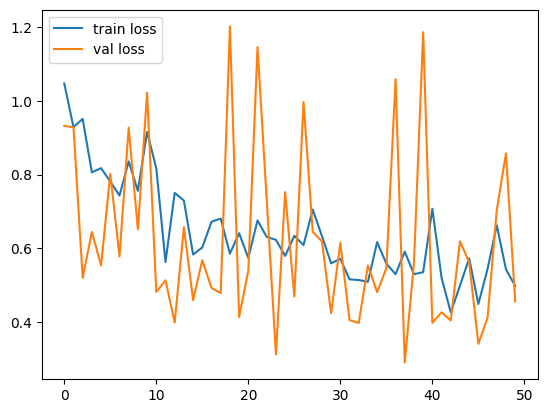

<Figure size 640x480 with 0 Axes>

In [56]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

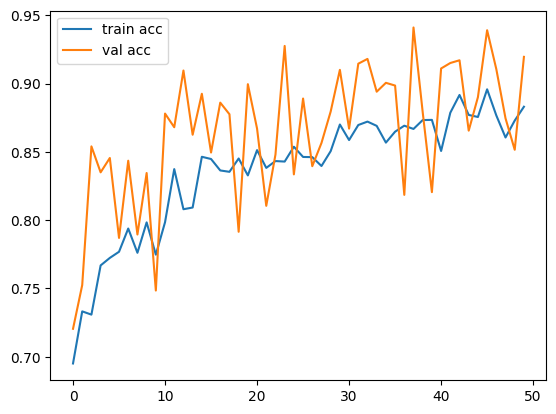

<Figure size 640x480 with 0 Axes>

In [57]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [58]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
y_pred = model.predict(test_set)

63/63 [==============================] - 56s 873ms/step


In [60]:
y_pred

array([[1.0000000e+00, 1.4928152e-18, 1.8916692e-21, ..., 1.8665885e-20,
        1.5956397e-13, 3.9253302e-38],
       [1.0000000e+00, 3.4784156e-10, 3.3852872e-11, ..., 6.5808331e-18,
        8.2974552e-09, 0.0000000e+00],
       [6.2274456e-11, 3.8968834e-13, 7.8618378e-13, ..., 5.2172500e-14,
        5.0187566e-11, 7.2780749e-24],
       ...,
       [1.8008340e-07, 1.8641269e-07, 8.6165837e-06, ..., 4.4789857e-15,
        8.0583328e-07, 8.3888582e-12],
       [1.7989117e-09, 1.8865087e-06, 9.9985087e-01, ..., 5.7545040e-14,
        1.3671325e-05, 4.9964564e-17],
       [5.9853129e-11, 2.4584664e-12, 8.4016545e-09, ..., 1.7076591e-12,
        1.4785086e-10, 6.2683859e-13]], dtype=float32)

In [61]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [66]:
y_pred

array([0, 0, 4, ..., 4, 2, 3])

In [67]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [68]:
model=load_model('model_resnet50.h5')

In [143]:
img=image.load_img('Datasets/test/God of War/image_27.png',target_size=(224,224))

In [144]:
x=image.img_to_array(img)
x

array([[[ 0.,  2.,  2.],
        [ 0.,  2.,  2.],
        [ 0.,  2.,  2.],
        ...,
        [ 0.,  2.,  2.],
        [ 0.,  2.,  2.],
        [ 0.,  2.,  2.]],

       [[ 0.,  2.,  2.],
        [ 0.,  2.,  2.],
        [ 0.,  2.,  2.],
        ...,
        [ 0.,  2.,  2.],
        [ 0.,  2.,  2.],
        [ 0.,  2.,  2.]],

       [[ 0.,  2.,  2.],
        [ 0.,  2.,  2.],
        [ 0.,  2.,  2.],
        ...,
        [ 0.,  2.,  2.],
        [ 0.,  2.,  2.],
        [ 0.,  2.,  2.]],

       ...,

       [[11., 17., 18.],
        [12., 18., 19.],
        [12., 18., 19.],
        ...,
        [12., 18., 19.],
        [12., 18., 19.],
        [12., 19., 17.]],

       [[11., 17., 18.],
        [12., 18., 19.],
        [12., 18., 19.],
        ...,
        [12., 18., 19.],
        [12., 18., 19.],
        [12., 18., 19.]],

       [[10., 16., 17.],
        [11., 17., 18.],
        [11., 17., 18.],
        ...,
        [12., 18., 19.],
        [12., 18., 19.],
        [12., 18., 19.]]

In [145]:
x.shape

(224, 224, 3)

In [146]:
x = x/255

In [147]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [148]:
model.predict(img_data)

1/1 [==============================] - 0s 66ms/step


array([[5.6317135e-34, 2.6434776e-29, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.9999940e-01, 1.1076556e-13,
        5.7142739e-07, 0.0000000e+00]], dtype=float32)

In [149]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 50ms/step


In [150]:
a

array([6])